In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

In [2]:
X = []
labels = []

In [3]:
for root, dirs, files in os.walk(".\dataset", topdown=False):
    for name in files:
        print(os.path.join(root,name))
        data = pd.read_csv(os.path.join(root,name), header=None, index_col=False)
        df_arr = data.as_matrix()
        N, D = df_arr.shape
        for i in range(0,N,1):
            X.append(df_arr[i,1:D])
            labels.append(int(df_arr[i, 0] - 1))

.\dataset\10.4.14.84_19-10-2017_15-58-28.mp4.dataset.csv
.\dataset\151223-2202.mp4.dataset.csv
.\dataset\15_59_34.072.avi.dataset.csv
.\dataset\16_00_06.789.avi.dataset.csv
.\dataset\16_01_41.812.avi.dataset.csv
.\dataset\16_01_58.060.avi.dataset.csv
.\dataset\16_02_19.232.avi.dataset.csv
.\dataset\16_02_38.857.avi.dataset.csv
.\dataset\16_04_10.661.avi.dataset.csv
.\dataset\16_05_29.723.avi.dataset.csv
.\dataset\81_1.mp4.dataset.csv
.\dataset\877_frag_eight.mp4.dataset.csv
.\dataset\877_frag_five.mp4.dataset.csv
.\dataset\877_frag_four.mp4.dataset.csv
.\dataset\877_frag_one.mp4.dataset.csv
.\dataset\877_frag_three.mp4.dataset.csv
.\dataset\877_frag_two.mp4.dataset.csv
.\dataset\888.mp4.dataset.csv
.\dataset\birds.mp4.dataset.csv
.\dataset\Cam4_19-10-2017_14-30-13.mp4.dataset.csv
.\dataset\Cam4_23-10-2017_17-20-03.mp4.dataset.csv
.\dataset\Cam_4_03-11-2017_12-23-32.mp4.dataset.csv
.\dataset\Cam_4_03-11-2017_12-34-08.mp4.dataset.csv
.\dataset\flight.mp4.dataset.csv
.\dataset\gopro142.mp

In [4]:
labels = np.array(labels)
len(labels[labels==0])

298

In [5]:
len(labels[labels==1])

3011

In [6]:
X = np.array(X)

In [7]:
labels

array([1, 1, 1, ..., 1, 0, 0])

In [8]:
index0 = np.where(labels==0)[0]
index1 = np.where(labels==1)[0]

In [9]:
index1_cut = index1[:(len(labels[labels==0]))]
new_labels = np.concatenate((labels[index0], labels[index1_cut]), 0)

In [10]:
new_X = np.concatenate((X[index0], X[index1_cut]), 0)

In [11]:
len(new_X)

596

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, label_train, label_test = train_test_split(np.array(new_X), np.array(new_labels), test_size=0.1, random_state=43, stratify=new_labels)

In [13]:
y_train = np.reshape(label_train, (label_train.size, 1))
y_train = np.concatenate((1 - y_train, y_train), 1)

In [14]:
y_test = np.reshape(label_test, (label_test.size, 1))
y_test = np.concatenate((1 - y_test, y_test), 1)

In [50]:
from keras.layers import Dense, Input
from keras.models import Model

inp = Input(shape=(1040,))
dense_1 = Dense(512, activation='relu')(inp)
dense_2 = Dense(64, activation='sigmoid')(dense_1)
dense_3 = Dense(2, activation='softmax')(dense_2)

model = Model(inputs=inp, outputs=dense_3)

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1040)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               532992    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 130       
Total params: 565,954
Trainable params: 565,954
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, batch_size=4, epochs=10, verbose=2, validation_data=(X_test, y_test))

Train on 536 samples, validate on 60 samples
Epoch 1/10
 - 2s - loss: 0.4498 - categorical_accuracy: 0.8022 - val_loss: 0.2849 - val_categorical_accuracy: 0.9000
Epoch 2/10
 - 1s - loss: 0.2251 - categorical_accuracy: 0.9216 - val_loss: 0.2203 - val_categorical_accuracy: 0.9500
Epoch 3/10
 - 1s - loss: 0.1537 - categorical_accuracy: 0.9459 - val_loss: 0.2291 - val_categorical_accuracy: 0.9167
Epoch 4/10
 - 1s - loss: 0.1233 - categorical_accuracy: 0.9552 - val_loss: 0.2623 - val_categorical_accuracy: 0.9167
Epoch 5/10
 - 1s - loss: 0.1026 - categorical_accuracy: 0.9627 - val_loss: 0.2936 - val_categorical_accuracy: 0.9000
Epoch 6/10
 - 1s - loss: 0.0692 - categorical_accuracy: 0.9776 - val_loss: 0.2298 - val_categorical_accuracy: 0.9167
Epoch 7/10
 - 1s - loss: 0.0725 - categorical_accuracy: 0.9757 - val_loss: 0.2497 - val_categorical_accuracy: 0.9167
Epoch 8/10
 - 1s - loss: 0.0697 - categorical_accuracy: 0.9739 - val_loss: 0.3057 - val_categorical_accuracy: 0.9000
Epoch 9/10
 - 1s - 

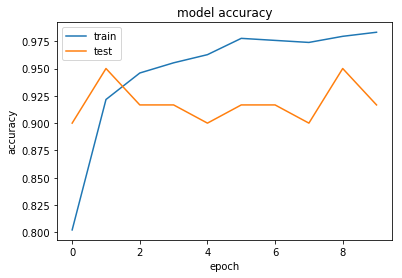

In [54]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

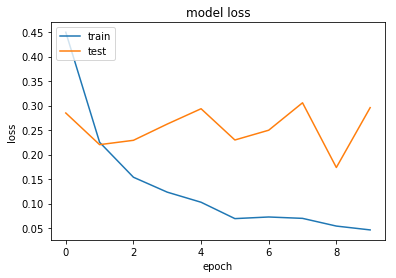

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
label_pred = model.predict(X_test)

In [63]:
label_pred

array([[9.99002516e-01, 9.97470226e-04],
       [7.57887125e-01, 2.42112815e-01],
       [9.99455750e-01, 5.44267707e-04],
       [9.92141008e-01, 7.85892922e-03],
       [9.96415734e-01, 3.58425290e-03],
       [1.78891234e-03, 9.98211145e-01],
       [8.79780352e-01, 1.20219685e-01],
       [9.98661995e-01, 1.33804453e-03],
       [9.88747835e-01, 1.12521015e-02],
       [6.68960251e-03, 9.93310452e-01],
       [2.19083647e-03, 9.97809231e-01],
       [8.99059951e-01, 1.00940056e-01],
       [9.99619007e-01, 3.80939658e-04],
       [1.54504990e-02, 9.84549522e-01],
       [9.99606073e-01, 3.93956056e-04],
       [9.98230994e-01, 1.76899566e-03],
       [9.98617887e-01, 1.38212589e-03],
       [2.67258659e-03, 9.97327447e-01],
       [9.99056518e-01, 9.43505089e-04],
       [9.90585983e-01, 9.41404328e-03],
       [9.98962522e-01, 1.03751896e-03],
       [9.98688519e-01, 1.31152919e-03],
       [9.97417688e-01, 2.58224225e-03],
       [1.22368122e-02, 9.87763107e-01],
       [9.993966

In [77]:
y_res = np.argmax(label_pred, axis=1)

In [78]:
y_res

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
y_class = np.reshape(y_res, (y_cres.size, 1))
y_class = np.concatenate((1 - y_class, y_class), 1)

In [71]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [72]:
f1_score(y_test, y_class, average=None)

array([0.92307692, 0.90909091])

In [73]:
precision_score(y_test, y_class, average=None)

array([0.85714286, 1.        ])

In [74]:
recall_score(y_test, y_class, average=None)

array([1.        , 0.83333333])

In [75]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(label_test, y_class)

array([[30,  0],
       [ 5, 25]], dtype=int64)

In [80]:
model.save("model1.h5")